# EDA analysis.
## Net load on a weekly resolution. 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [88]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)

COLOR_SUMMER = '#f9da21'
COLOR_WINTER = '#70b2b2'
COLOR_AUTUMN  = '#9e9e9e'
COLOR_SPRING = '#97be6d'

cmaps_hex = [COLOR_SPRING,COLOR_SUMMER,COLOR_AUTUMN,COLOR_WINTER]
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
RSEED = 42

In [89]:
# Load data for building 5
building_nr = 5
df = pd.read_csv(f"../data/preprocessed/Building_{building_nr}.csv").astype({'datetime': 'datetime64'})#.set_index('datetime')


In [90]:
data_df = df.assign(
    timestamp = lambda x: pd.to_datetime(x['datetime']), 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    weekofyear = lambda x: x['timestamp'].dt.weekofyear,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)
weekly_data_df = data_df\
    .groupby(['date','year','month','weekofyear','day','dayofyear'], as_index=False)\
    .agg({'net_load_kWh':np.mean})\
    .set_index('date')

/var/folders/8t/vxvv0wfd7q7_yj7gmh717sww0000gn/T/ipykernel_8279/3343951730.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekofyear = lambda x: x['timestamp'].dt.weekofyear,


In [96]:
season = list(np.repeat(['Winter','Spring','Summer','Autumn'],3))
season.append(season.pop(0))
# df_season = pd.DataFrame({'season':season, 'month':[month%12 // 3 + 1 for month in range(1, 13)]}, index=range(12))
df_season = pd.DataFrame({'season':season, 'month':range(1,13)}, index=range(12))
data_df = pd.merge(data_df, df_season, how='left', on='month')

In [91]:
data_df['season1'] = pd.Categorical.from_codes((data_df.month-1)//3, ['Winter','Spring','Summer','Autumn'])

In [92]:
data_df

,datetime,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kWh,dhw_heating_kWh,cooling_load_kWh,solar_generation_W_kW,outdoor_temp,...,electric_load_hp_kW,timestamp,date,year,month,day,weekofyear,dayofyear,hour,season1
0,2008-01-02 00:00:00,0,22.02,0.0,55.86,11.7,3.00,1.61,0.0,9.40,...,0.170,2008-01-02 00:00:00,2008-01-02,2008,1,2,1,2,0,Winter
1,2008-01-02 01:00:00,0,21.78,0.0,52.90,7.2,3.36,0.47,0.0,7.61,...,0.029,2008-01-02 01:00:00,2008-01-02,2008,1,2,1,2,1,Winter
2,2008-01-02 02:00:00,0,21.77,0.0,50.06,8.1,0.36,0.58,0.0,8.11,...,0.043,2008-01-02 02:00:00,2008-01-02,2008,1,2,1,2,2,Winter
3,2008-01-02 03:00:00,0,21.81,0.0,47.95,12.4,0.12,1.19,0.0,8.36,...,0.096,2008-01-02 03:00:00,2008-01-02,2008,1,2,1,2,3,Winter
4,2008-01-02 04:00:00,0,21.77,0.0,46.91,8.6,0.00,0.59,0.0,8.78,...,0.053,2008-01-02 04:00:00,2008-01-02,2008,1,2,1,2,4,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2011-12-31 19:00:00,0,21.69,0.0,27.91,11.4,0.72,0.16,0.0,4.75,...,-0.001,2011-12-31 19:00:00,2011-12-31,2011,12,31,52,365,19,Autumn
35036,2011-12-31 20:00:00,0,21.69,0.0,26.48,14.8,0.12,0.26,0.0,3.55,...,-0.009,2011-12-31 20:00:00,2011-12-31,2011,12,31,52,365,20,Autumn
35037,2011-12-31 21:00:00,0,21.66,0.0,25.10,14.0,0.36,0.13,0.0,2.54,...,-0.008,2011-12-31 21:00:00,2011-12-31,2011,12,31,52,365,21,Autumn
35038,2011-12-31 22:00:00,0,21.61,0.0,24.07,11.2,0.72,0.00,0.0,1.45,...,-0.000,2011-12-31 22:00:00,2011-12-31,2011,12,31,52,365,22,Autumn


<AxesSubplot:xlabel='weekofyear', ylabel='net_load_kWh'>

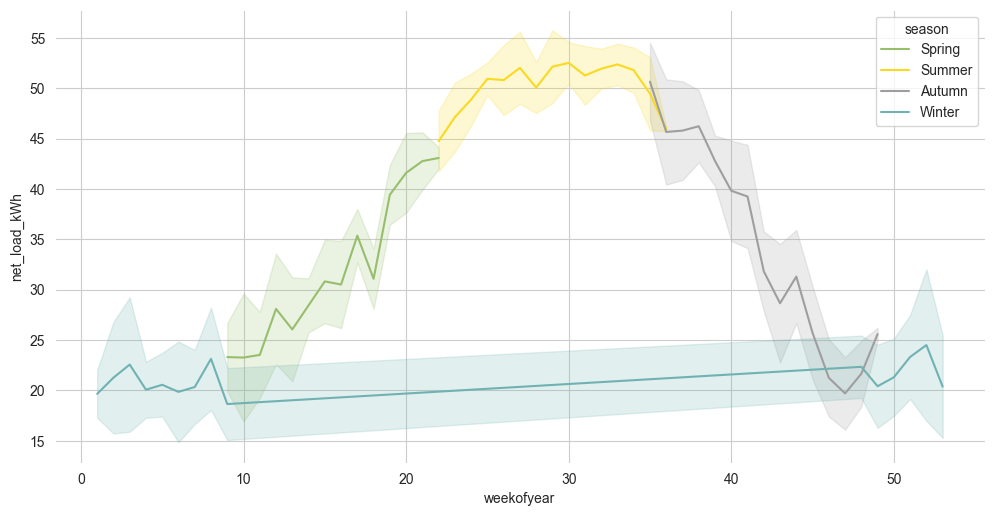

In [97]:
# data_df['net_load_kWh'].rolling(24*7, center=True, min_periods=1).mean().plot(hue='season')

sns.lineplot(x=data_df['weekofyear'], y=data_df['net_load_kWh'].rolling(24*7, center=True, min_periods=1).mean(), 
    hue=data_df['season'], hue_order=['Spring','Summer','Autumn','Winter'], seed=RSEED, ci='sd')

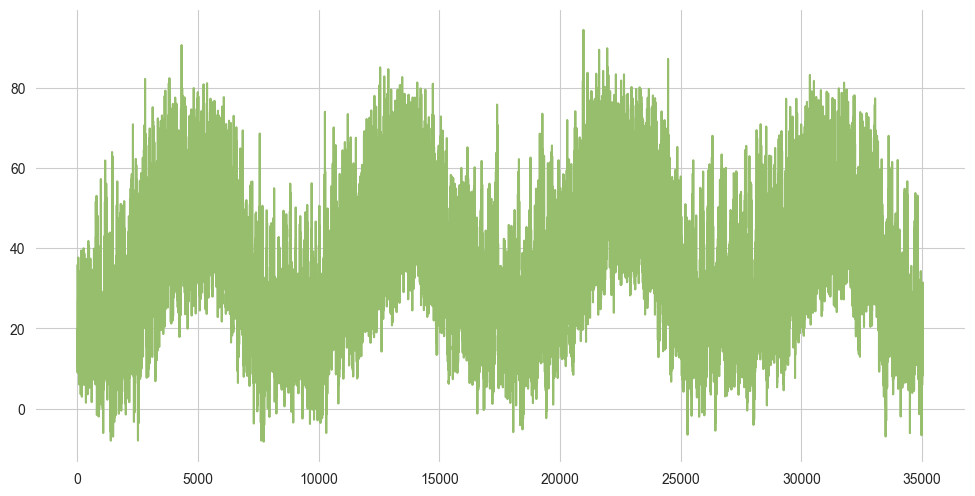

In [102]:
plt.plot(data_df['net_load_kWh'])

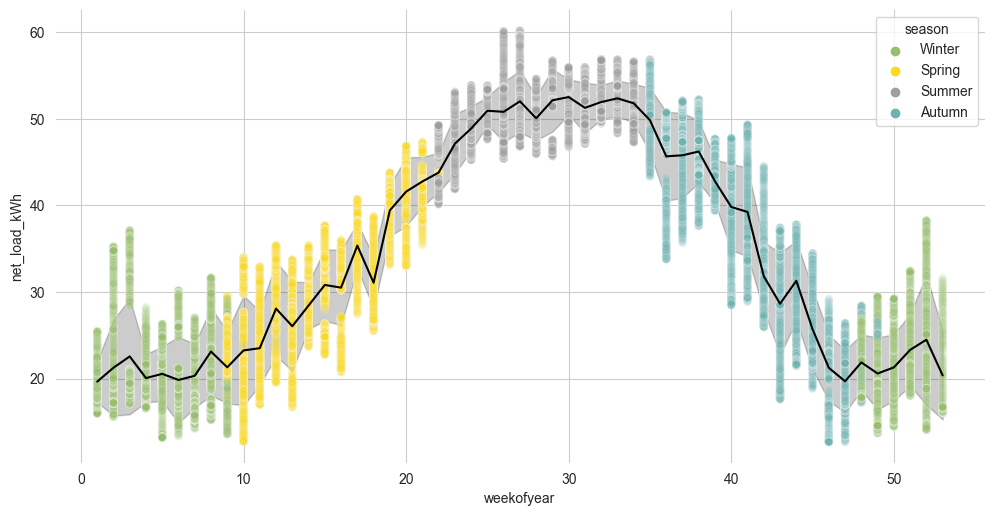

In [98]:
ax = sns.lineplot(x=data_df['weekofyear'], y=data_df['net_load_kWh'].rolling(24*7, center=True, min_periods=1).mean(), 
             color = 'black', ci='sd')
sns.scatterplot(x=data_df['weekofyear'], y=data_df['net_load_kWh'].rolling(24*7, center=True, min_periods=1).mean(), 
        alpha=0.2, hue = data_df['season'], ax = ax)
sns.despine()

AttributeError: module 'seaborn' has no attribute 'scaterplot'

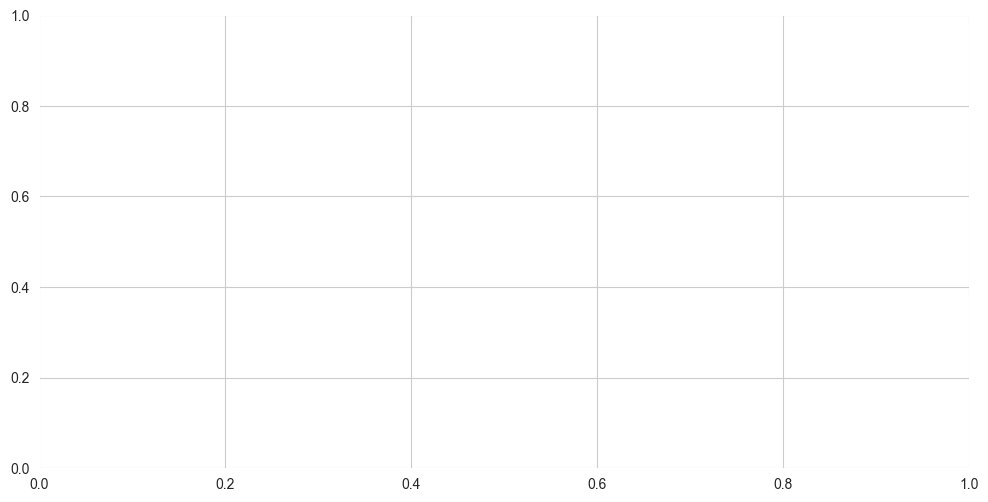

In [61]:
fig, ax = plt.subplots()
#plt.subplot(1, 2, 1)

ax = sns.scaterplot(data=data_df, y='net_load_kWh', x='weekofyear',  hue='season', hue_order=['Spring','Summer','Autumn','Winter'])
ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Mean net energy usage', xlabel='Week of the year', ylabel='kWh');
fig.savefig('./images/weekoftheyear_net_energy_usage.png', dpi=450, bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots()
#plt.subplot(1, 2, 1)

ax = sns.lineplot(data=data_df, y='net_load_kWh', x='month',  hue='season', hue_order=['Spring','Summer','Autumn','Winter'])
ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Mean net energy usage', xlabel='Month of the year', ylabel='kWh');
fig.savefig('./images/montly_net_energy_usage.png', dpi=450, bbox_inches='tight')


In [104]:
fig, ax = plt.subplots()
ax = sns.lineplot(x = df['datetime'], y = df['net_load_kWh'].rolling(24*7, center=True).mean())
ax = sns.lineplot(x = df['datetime'], y = df['season_Y']+model.intercept_)
ax = sns.lineplot(x = df['datetime'], y = df['trend_Y'])
ax = sns.lineplot(x = df['datetime'], y = df['decom_Y'].rolling(24*7, center = True, min_periods=1).mean())
ax.set(title = 'Energy net usage (Yearly decomposition)', xlabel='', ylabel='kWh');
# fig.legend()
fig.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Signal', 'Seasonality (Trigonometric)', 'Trend', 'Residuals'])
fig.savefig('../images/decomposition_yearly_net_energy_usage_trigonometric_seasonality.png', dpi=450, bbox_inches='tight')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


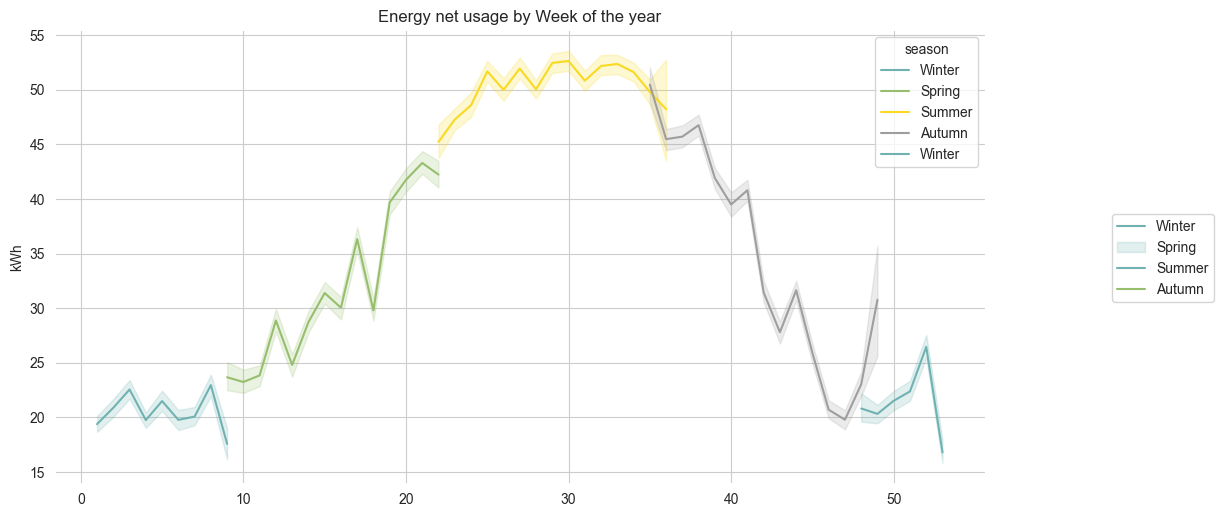

In [129]:
fig, ax = plt.subplots()
ax = sns.lineplot(x = data_df.query("weekofyear<20")['weekofyear'], y = data_df.query("season == 'Winter'")['net_load_kWh'], hue =data_df[data_df['season']=='Winter']['season'], palette= [COLOR_WINTER])
ax = sns.lineplot(x = data_df['weekofyear'], y = data_df.query("season == 'Spring'")['net_load_kWh'], hue =data_df[data_df['season']=="Spring"]['season'], palette = [COLOR_SPRING])
ax = sns.lineplot(x = data_df['weekofyear'], y = data_df.query("season == 'Summer'")['net_load_kWh'], hue =data_df[data_df['season']=="Summer"]['season'], palette = [COLOR_SUMMER])
ax = sns.lineplot(x = data_df['weekofyear'], y = data_df.query("season == 'Autumn'")['net_load_kWh'], hue =data_df[data_df['season']=="Autumn"]['season'], palette = [COLOR_AUTUMN])
ax = sns.lineplot(x = data_df.query("weekofyear>20")['weekofyear'], y = data_df.query("season == 'Winter'")['net_load_kWh'], hue =data_df[data_df['season']=='Winter']['season'], palette= [COLOR_WINTER])
ax.set(title = 'Energy net usage by Week of the year', xlabel='', ylabel='kWh');
# fig.legend()
fig.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Winter','Spring','Summer','Autumn'])
#fig.savefig('../images/decomposition_yearly_net_energy_usage_trigonometric_seasonality.png', dpi=450, bbox_inches='tight')

In [191]:
df_winter1 = data_df[(data_df['season']=='Winter') & (data_df['weekofyear']< 20)].set_index('weekofyear')['net_load_kWh'].rolling(24,center=True, min_periods=1).mean()
df_spring = data_df[(data_df['season']=='Spring') & (data_df['weekofyear']< 30)].set_index('weekofyear')['net_load_kWh'].rolling(24, center=True, min_periods=1).mean()
df_summer = data_df[(data_df['season']=='Summer') & (data_df['weekofyear']< 40)].set_index('weekofyear')['net_load_kWh'].rolling(24, center=True, min_periods=1).mean()
df_autumn = data_df[(data_df['season']=='Autumn') & (data_df['weekofyear']< 50)].set_index('weekofyear')['net_load_kWh'].rolling(24, center=True, min_periods=1).mean()
df_winter2 = data_df[(data_df['season']=='Winter') & (data_df['weekofyear']>40)].set_index('weekofyear')['net_load_kWh'].rolling(24, center=True, min_periods=1).mean()


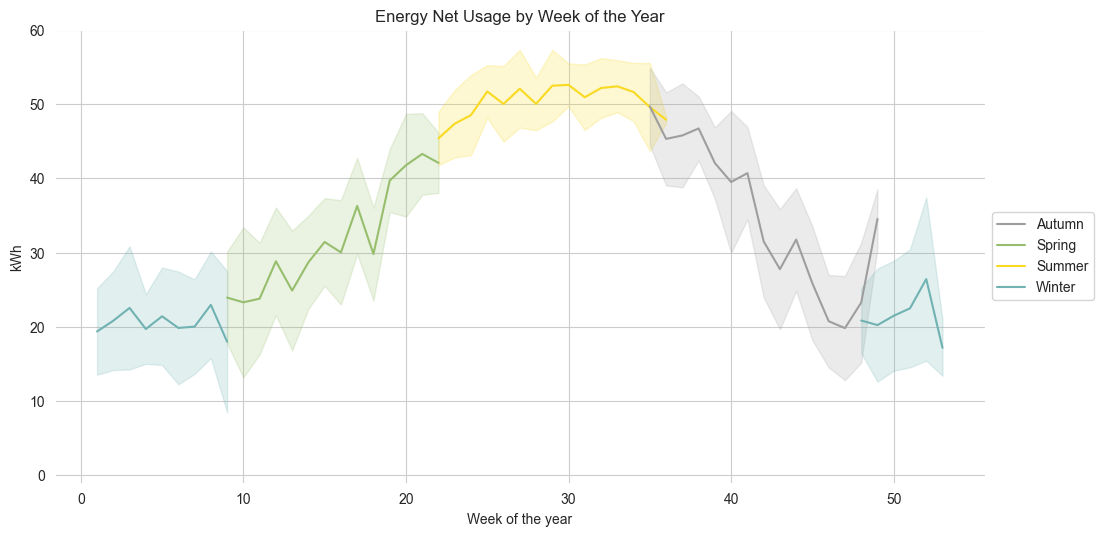

In [273]:
from matplotlib.pyplot import legend


fig, ax = plt.subplots()
ax = sns.lineplot(data = pd.DataFrame(df_winter1).rename(columns={'net_load_kWh':'Winter'}), palette=[COLOR_WINTER], ci ='sd')
ax = sns.lineplot(data = pd.DataFrame(df_spring).rename(columns={'net_load_kWh':'Spring'}), palette=[COLOR_SPRING], ci = 'sd')
ax = sns.lineplot(data = pd.DataFrame(df_summer).rename(columns={'net_load_kWh':'Summer'}), palette=[COLOR_SUMMER], ci = 'sd')
ax = sns.lineplot(data = pd.DataFrame(df_autumn).rename(columns={'net_load_kWh':'Autumn'}), palette=[COLOR_AUTUMN], ci = 'sd')
ax = sns.lineplot(data = pd.DataFrame(df_winter2).rename(columns={'net_load_kWh':'Winter'}), palette=[COLOR_WINTER], ci = 'sd')
ax.set(title = 'Energy Net Usage by Week of the Year', xlabel='Week of the year', ylabel='kWh')
ax.set_ylim(-1,60)
handles, labels = ax.get_legend_handles_labels()
plt.legend([handles[index] for index in [3,1,2,0]], [labels[index] for index in [3,1,2,0]], bbox_to_anchor=(1, 0.5), loc='center left')


In [261]:

labels[1]

'Spring'

In [263]:
[labels[index] for index in [3,1,2,0]]

['Autumn', 'Spring', 'Summer', 'Winter']